#### 2019_02_28 ML Lecture
* updated 2019_02_07 w/ info on reading in and processing an image

# 1. Where are you stuck?
```


























```

# 2. How to read in/process an Image
* I'm using `os`, but there are other libraries for this.
    * What are you using?

In [19]:
from os import listdir, getcwd

listdir()

['.DS_Store',
 '.git',
 '.gitignore',
 '.ipynb_checkpoints',
 '00__vectorization_in_numpy.ipynb',
 '01__2019_03_07_img_io_and_simple_crossval.ipynb',
 'data',
 'images',
 'README.md']

In [20]:
listdir('data')

['.DS_Store', 'iris.data.txt', 'KNN', 'KNN.zip']

In [21]:
listdir('data/KNN')

['.DS_Store', 'animals']

In [22]:
listdir('data/KNN/animals')

['.DS_Store', 'cats', 'dogs', 'panda']

#### Now we can see our folder items

In [23]:
subfolder = 'data/KNN/animals/'
classes = listdir(subfolder)
print(classes)

['.DS_Store', 'cats', 'dogs', 'panda']


#### Should remove erroneous file

In [24]:
classes.remove('.DS_Store')
classes

['cats', 'dogs', 'panda']

In [25]:
cats_filenames = listdir(subfolder + classes[0])
print(cats_filenames[0])

cats_00001.jpg


#### We need the filepath, so let's add that to the front of the image names
* if you run this cell twice, it will break the filename

In [26]:
cats_filenames = [subfolder + classes[0] + '/' + \
                  filename for filename in cats_filenames]
cats_filenames[0]

'data/KNN/animals/cats/cats_00001.jpg'

#### Let's read in an image and look at it
* I'm using skimage to read in the image.
    * cv2
    * what are you using?

In [33]:
from skimage.io import imread

cat0_rgb = imread(cats_filenames[0])
print(type(cat0_rgb))
cat0_rgb.shape

<class 'numpy.ndarray'>


(374, 500, 3)

#### Let's look at the image

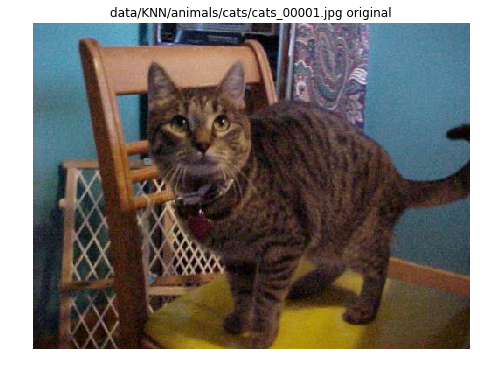

In [31]:
import matplotlib.pyplot as plt

def plot_image(img, title):
    # Plot image
    fig, ax1 = plt.subplots(ncols=1, figsize=(18, 6), sharex=True,
                                   sharey=True)
    ax1.imshow(img, cmap='gray')
    ax1.set_title(title)
    ax1.axis('off')
    
plot_image(cat0_rgb, cats_filenames[0] + ' original')


#### Let's unwrap this cat
* notice we have 3 color channels
* we want to resize/interpolate to 32x32 matrix
* we want to convert to a (1,3) shape vector

In [12]:
cat0_rgb.shape

(374, 500, 3)

#### Since you've already seen it, let's use cv2 for resizing the image
* you could use the equivalent skimage function

In [13]:
import cv2

cat0_resize = cv2.resize(cat0_rgb, (32, 32),interpolation=cv2.INTER_CUBIC)
cat0_resize.shape


(32, 32, 3)

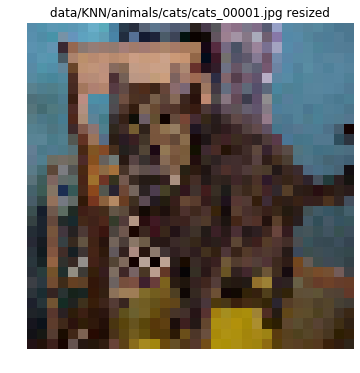

In [14]:
plot_image(cat0_resize, cats_filenames[0] + ' resized')

#### Now we reshape

In [15]:
cat0_vect = cat0_resize.reshape(1,3072)

cat0_vect.shape

(1, 3072)

#### You just need to do this for all images in your dataset

```











```

# 3. What is the basic workflow for a supervised ML endeavor?

> ## 1. import/clean/reshape data
> * this is the stage where you should expect to devote the most time

> ## 2. train/test split
> * note: using validation and setting aside test as hold-out set

```
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=23)

X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=23)
```

> ## 3. search for optimal model/hyperparameters 
> * in our case, using KNN only
> * in our case, using the validation subset of X_test
> * minimizing loss or maximizing some classification metric
> * e.g.,
    * best num/combination of features
    * best cost/loss function: MAE/MSE etc
> * **general cross val approach**:

```
for every combination of hyperparameters:
    fit model with X_train/y_train
    y_pred <- predictions on X_val
    record comparison of y_pred given combination
        y_pred_train <- cost(model.predict(X_train), y_train)
        y_pred_val <- cost(model.predict(X_val) , y_val)
```
    
> * optimal combination will have lowest cost or highest classification metric for y

> ## 4. model fit
> * fit model using training data `X_train` and `y_train`
    * can add back in the validation set `X_val`, `y_val`

> ## 5. model predict
> * y_pred_train <- predictions on X_train
> * y_pred_test <- predictions on X_test

> ## 6. report metrics
> * metrics: 
    * cost(model.predict(X_train) , y_train)
    * cost(model.predict(X_test) , y_test)


# 4. Let's revisit the general idea of Cross Validation

![xkcd on crossval](images/xkcd_curve_fitting.png)

## First, let's consider a scatterplot
* at different levels of complexity
    * complexity here just means order of the polynomial
    * complexity can refer to the number of features, width of our matrix, etc

In [15]:
import numpy as np
import matplotlib.pyplot as plt

def plot_scatter_fit(N=50, fit_compexity=1, degree=1):
    N = N
    np.random.seed(seed=23)
    x = np.random.rand(N)*20

    if degree==1:
        y = 5*x+3
    elif degree==2:
        y = 1.3*x**2 + 5*x + 3
    elif degree==3:
        y = -.2*x**3 + 1.3*x**2 + 5*x + 3
    else:
        y = .006*x**4 + -.2*x**3 + 1.3*x**2 + 5*x + 3

    fit = np.polyfit(x,y,1)
    fit_fn = np.poly1d(fit)

    # get range for adding scatter
    y_val_range = np.ptp(y)

    # add normal noise to output
    y = [pt + np.random.normal(loc=0.0, 
                               scale=((1./10.)*y_val_range)) 
         for pt in y]

    fit_complexity = fit_compexity
    regr = np.poly1d(np.polyfit(x, y, fit_complexity))(np.unique(x))

    # plot 
    plt.title('N:{} \n '.format(N) + \
              'data_degree:{} \n'.format(degree) + \
              'fit_complexity:{}'.format(fit_complexity))
    plt.scatter(x, y, c='b', alpha=0.5)
    plt.plot(np.unique(x), regr)


    plt.show()

/Users/tbot/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:30: RankWarning: Polyfit may be poorly conditioned


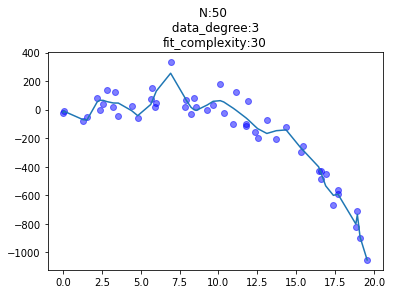

In [16]:
# Adjust N, fit complexity and degree 
#   to get a clearer sense of homoscedasticity
plot_scatter_fit(N=50, fit_compexity=30, degree=3)

### looking at our data, it isn't clear which complexity is the most appropriate to construct:
* Given we created the original function, we are aware that the fit line "should" have complexity of 4
* $AX^4 + BX^3 + \dots + C$
    * $A, B$ are coefficients derived by our linear regression algorithm
    * $C$ is our irreducible error
* visually, there is intuition re: when we are under or overfit
    * complexity 1 is underfit
    * complexity 10 is clearly overfitting
    * at some point of higher complexity, we are connecting the dots or the means of the x-vals

# 5. Crossval Applied to KNN for Categorical Outcome
[reference link](https://kevinzakka.github.io/2016/07/13/k-nearest-neighbor/)

## Remember:
* KNN is supervised
    * X and y data
* KNN is non-parametric
    * potential to interpret non-linear data signal
* KNN training data **IS ESSENTIALLY** the fit model
    * must store data/model in memory
    * prediction is computationally expensive
* KNN prediction is the majority vote between the K most similar instances on an unseen data point

```
Given a structured data set:
    set value of k
    for each data point
        find k most similar data points
        check class of each of k similar data points
        assume current data point is of the majority class
```

* **Distance/similarity metrics**
    * euclidean distance: 
        * $d(\mathbf x^{(0)}, \mathbf x^{(i)}) = \sqrt{(x^{(0)}_1 - x^{(i)}_1) + (x^{(0)}_2-x^{(i)}_2) + \cdots } (x^{(0)}_n - x^{(i)}_n)$
        * "crow's fly" distance between two observation vectors
    * manhattan distance:
        * "city block" distance between two observation vectors
    * cosine similarity:
        * angle orientation similarity between two observation vectors
            

## Oh no, it's the iris dataset
* [get data here](https://archive.ics.uci.edu/ml/machine-learning-databases/iris/)
* sort of ideal low-dimensional continuous data for KNN
* 5 classes

In [17]:
# loading libraries
import pandas as pd

# define column names
names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']

# loading training data
df = pd.read_csv('data/iris.data.txt', header=None, names=names)
df.head()
columns = df.columns

150 150


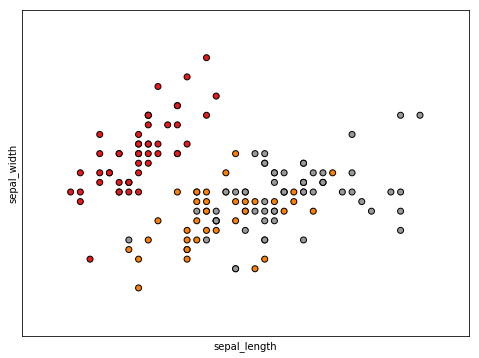

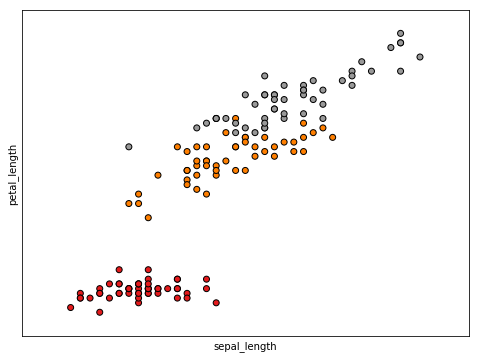

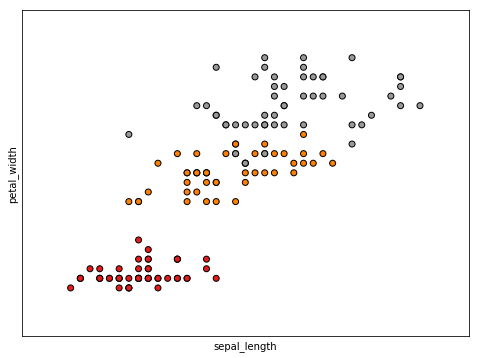

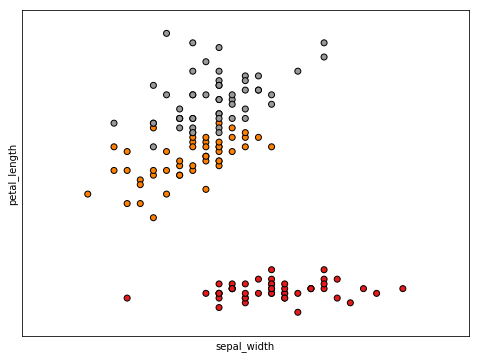

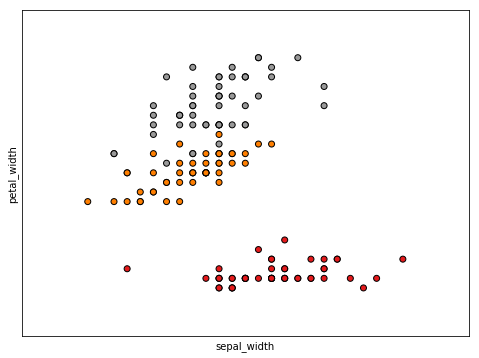

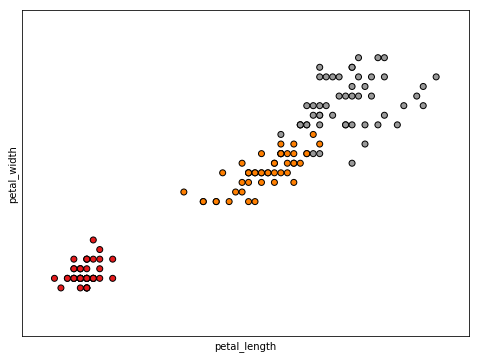

In [18]:
from sklearn.preprocessing import LabelEncoder


X = df[['sepal_length', 'sepal_width', 
       'petal_length', 'petal_width']]
y = df['class']

# encode y_vals to numbered classes




def plot_features(X_df,y_df, columns):
    le = LabelEncoder()
    y = le.fit_transform(y_df)

    print(len(y),len(X_df))
    
    # every pair of features
    built_pairs = []
    for col1 in columns[:-1]:
        for col2 in columns[:-1]:
            if col1 != col2 and \
            (col1,col2) not in built_pairs and \
            (col2,col1) not in built_pairs:
                tup = (col1,col2)
                built_pairs.append(tup)
    

    for pair in built_pairs:
    
        x_lab = pair[0]
        y_lab = pair[1]        
        

        
        
        X = X_df[[x_lab,y_lab]].values

        x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
        y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
        
        plt.figure(2, figsize=(8, 6))
        plt.clf()

        # Plot the training points
        plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1,
                    edgecolor='k')
        plt.xlabel(x_lab)
        plt.ylabel(y_lab)



        plt.xlim(x_min, x_max)
        plt.ylim(y_min, y_max)
        plt.xticks(())
        plt.yticks(())
        plt.show()
    
plot_features(X,y, columns)


### Looking at these plots, it's visually clear that we have the potential for separability based on the given features.

# Let's Model IRIS with KNN

### 1. Import/Clean/Reshape Data

In [19]:
# loading libraries
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

### 2. Train/Test Split 

In [20]:
# create X and target vector y
# X = np.array(df.ix[:, 0:4]) # eliminate target

# NOTE: let's take the seemingly least separable features 
X = np.array(df[['sepal_length','sepal_width']])

# NOTE: let's look at another instance
# X = np.array(df[['petal_length','petal_width']])

y = np.array(df['class']) # another way of indexing a pandas df

# split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### 3. Search for hyperparams 
* Here, using simple CrossVal with only the test set

In [21]:
# hold scores for value of k neighbors 
#   (note these lists are parallel)
neighbors = list(range(1,30))
cv_train_scores = []
cv_test_scores = []

for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k, p=1)
    
    # fitting the model
    knn.fit(X_train, y_train)
    
    # get predictions on train
    y_train_pred = knn.predict(X_train)
    cv_train_scores.append(accuracy_score(y_train, 
                                          y_train_pred))
    
    # get predictions on test
    y_test_pred = knn.predict(X_test)
    cv_test_scores.append(accuracy_score(y_test, 
                                         y_test_pred))

# print(neighbors)
# print(cv_train_scores)
# print(cv_test_scores)

In [22]:
cv_test_scores;

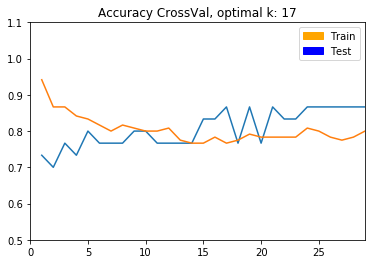

In [23]:
import matplotlib.patches as mpatches

test_min = cv_test_scores.index(max(cv_test_scores))
opt_k = neighbors[test_min]

axes = plt.gca()
axes.set_xlim([0,len(neighbors)])
axes.set_ylim([min(cv_test_scores)-.2,1.1])

red_patch = mpatches.Patch(color='orange', label='Train')
blue_patch = mpatches.Patch(color='blue', label='Test')
plt.legend(handles=[red_patch, blue_patch])

title="Accuracy CrossVal, optimal k: {}".format(opt_k)

axes.plot(neighbors,cv_test_scores, label='test scores')
axes.plot(neighbors,cv_train_scores, label='train scores')
plt.title(title);

### 4. Model fit

In [24]:
# instantiate learning model
knn = KNeighborsClassifier(n_neighbors=opt_k)

# fitting the model
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=17, p=2,
           weights='uniform')

### 5. Model predict

In [25]:
# predict the response
y_test_pred = knn.predict(X_test)

### 6. Report metrics

In [26]:
print('Accuracy: {}'.format(round(accuracy_score(y_test, 
                                                 y_test_pred),3)))

Accuracy: 0.867


## Some Specific Resources for this Project:
* https://www.pyimagesearch.com/2016/08/08/k-nn-classifier-for-image-classification/
* https://kevinzakka.github.io/2016/07/13/k-nearest-neighbor/